In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Input, Lambda,Flatten,Dense,LeakyReLU
import tensorflow as tf

Using TensorFlow backend.


In [2]:
from keras.layers.normalization import BatchNormalization
# from tensorflow.python.keras.callbacks import TensorBoard
from time import time
from keras.layers import Cropping2D
import sklearn
from sklearn.model_selection import train_test_split

/home/prateek/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pdb
from sklearn.utils import shuffle

### Reading Log Data

In [9]:
filelist=pd.read_csv('../../Pictures/driving_log.csv',\
                     header=None,names=['center','left','right','steering_angle','throttle','brake','speed'])

In [10]:
filelist.shape

(47595, 7)

In [11]:
filelist.head(5)

,center,left,right,steering_angle,throttle,brake,speed
0,/home/prateek/Pictures/IMG/center_2019_06_15_1...,/home/prateek/Pictures/IMG/left_2019_06_15_15_...,/home/prateek/Pictures/IMG/right_2019_06_15_15...,0.0,0.0,0.0,0.000005
1,/home/prateek/Pictures/IMG/center_2019_06_15_1...,/home/prateek/Pictures/IMG/left_2019_06_15_15_...,/home/prateek/Pictures/IMG/right_2019_06_15_15...,0.0,0.0,0.0,0.000001
2,/home/prateek/Pictures/IMG/center_2019_06_15_1...,/home/prateek/Pictures/IMG/left_2019_06_15_15_...,/home/prateek/Pictures/IMG/right_2019_06_15_15...,0.0,0.0,0.0,0.000001
3,/home/prateek/Pictures/IMG/center_2019_06_15_1...,/home/prateek/Pictures/IMG/left_2019_06_15_15_...,/home/prateek/Pictures/IMG/right_2019_06_15_15...,0.0,0.0,0.0,0.000001
4,/home/prateek/Pictures/IMG/center_2019_06_15_1...,/home/prateek/Pictures/IMG/left_2019_06_15_15_...,/home/prateek/Pictures/IMG/right_2019_06_15_15...,0.0,0.0,0.0,0.000006


Original Image


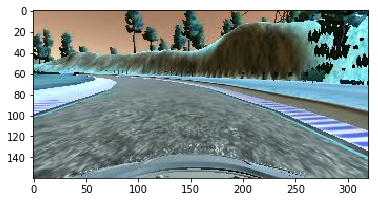

Flipped Image


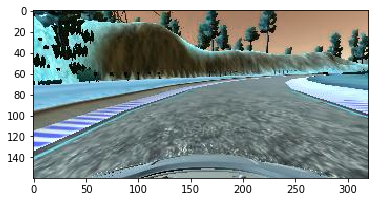

In [38]:
sample1=cv2.imread(filelist.center[0])
print("Original Image")
plt.imshow(sample1)
plt.show()
print("Flipped Image")
plt.imshow(cv2.flip(sample1,1))
plt.show()

Distribution of steering wheel axis (labels) BEFORE Augmentation


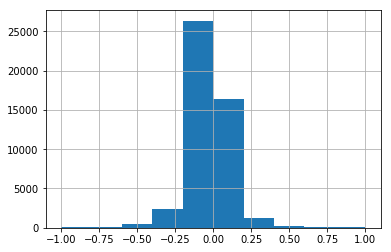

In [31]:
print("Distribution of steering wheel axis (labels) BEFORE Augmentation")
display(filelist.steering_angle.hist());

Distribution of steering wheel axis (labels) AFTER Augmentation


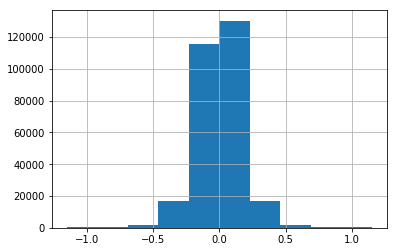

In [32]:
print("Distribution of steering wheel axis (labels) AFTER Augmentation")
display(filelist.steering_angle.append(filelist.steering_angle+0.15).\
append(filelist.steering_angle-0.15).append\
(-1*filelist.steering_angle).append(-1*(filelist.steering_angle)+0.15).\
append(-1*(filelist.steering_angle)-0.15).hist());

In [13]:
## Reading file in stream format
import os
import csv

samples = []
with open('../../Pictures/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samples.append(line)

In [14]:
samples[0]

['/home/prateek/Pictures/IMG/center_2019_06_15_15_40_12_134.jpg',
 '/home/prateek/Pictures/IMG/left_2019_06_15_15_40_12_134.jpg',
 '/home/prateek/Pictures/IMG/right_2019_06_15_15_40_12_134.jpg',
 '0',
 '0',
 '0',
 '5.231075E-06']

In [2]:
## Creating train and validation dataset

In [17]:
train_samples, validation_samples = train_test_split(samples, test_size=0.02)


In [18]:
print(np.array(train_samples).shape)
print(np.array(validation_samples).shape)


(46643, 7)
(952, 7)


In [19]:
def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            center_images=[]
            left_images=[]
            right_images=[]
            
            center_images_f=[]
            left_images_f=[]
            right_images_f=[]

            center_angle=[]
            left_angle=[]
            right_angle=[]

            center_angle_f=[]
            left_angle_f=[]
            right_angle_f=[]

            images = []
            angles = []
            for batch_sample in batch_samples: 
                temp_c = cv2.imread(batch_sample[0])
                angle_c = float(batch_sample[3])
                temp_l = cv2.imread(batch_sample[1])
                angle_l = float(batch_sample[3])+0.15
                temp_r = cv2.imread(batch_sample[2])
                angle_r = float(batch_sample[3])-0.15
                
                center_images.append(temp_c)
                left_images.append(temp_l)
                right_images.append(temp_r)

                center_angle.append(angle_c)
                left_angle.append(angle_l)
                right_angle.append(angle_r)
                #Data Augumentation
                temp_c_f = cv2.flip(temp_c,1)
                temp_l_f = cv2.flip(temp_l,1)
                temp_r_f = cv2.flip(temp_r,1)
                
                angle_c_f = -1.0*angle_c
                angle_l_f = -1.0*angle_l
                angle_r_f = -1.0*angle_r
                center_images_f.append(temp_c_f)
                left_images_f.append(temp_l_f)
                right_images_f.append(temp_r_f)

                center_angle_f.append(angle_c_f)
                left_angle_f.append(angle_l_f)
                right_angle_f.append(angle_r_f)
                
            images=np.vstack([center_images,left_images,right_images,center_images_f,left_images_f,right_images_f])
            angles=np.hstack([center_angle,left_angle,right_angle,center_angle_f,left_angle_f,right_angle_f])
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)
            


In [21]:
batch_size=32

In [22]:
train_generator = generator(train_samples, batch_size=batch_size)
validation_generator = generator(validation_samples, batch_size=batch_size)

### From nvidia paper
https://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf
> The first layer of the network performs image normalization. The normalizer is hard-coded and is not
adjusted in the learning process. Performing normalization in the network allows the normalization
scheme to be altered with the network architecture and to be accelerated via GPU processing.
The convolutional layers were designed to perform feature extraction and were chosen empirically
through a series of experiments that varied layer configurations. We use strided convolutions in the
first three convolutional layers with a 2×2 stride and a 5×5 kernel and a non-strided convolution
with a 3×3 kernel size in the last two convolutional layers.
We follow the five convolutional layers with three fully connected layers leading to an output control
value which is the inverse turning radius. The fully connected layers are designed to function as a
controller for steering, but we note that by training the system end-to-end, it is not possible to make
a clean break between which parts of the network function primarily as feature extractor and which
serve as controller.

### Designing Model

In [26]:
model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3))) 
model.add(Cropping2D(cropping=((70,25), (0,0))))

#The example above crops:

# 70 rows pixels from the top of the image
# 25 rows pixels from the bottom of the image
# 0 columns of pixels from the left of the image
# 0 columns of pixels from the right of the image
## normalize and mean center the input 


model.add(Conv2D(24, kernel_size=(5, 5),strides=2,
                 padding='valid',
                 activation='relu'))

model.add(Conv2D(36, kernel_size=(5, 5),strides=2,
                 padding='valid',
                 activation='relu'))

model.add(Conv2D(48, kernel_size=(5, 5),
                 strides=2,
                 padding='valid',
                 activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='valid',
                 activation='relu'))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='valid',
                 activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 37, 48)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 35, 64)         27712     
__________

In [27]:
from keras.optimizers import SGD, Adam, RMSprop
model.compile(loss = 'mse',optimizer=RMSprop(clipvalue=100),metrics=['accuracy'])


In [28]:
from keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

In [29]:
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [32]:
model.fit_generator(train_generator, \
            steps_per_epoch=np.ceil(len(train_samples)/batch_size), \
            validation_data=validation_generator, \
            validation_steps=np.ceil(len(validation_samples)/batch_size), \
            epochs=3, verbose=1)

# callbacks=callbacks_list,

Epoch 1/3
1458/1458 [==============================] - 144s 99ms/step - loss: 0.0186 - acc: 0.0511 - val_loss: 0.0153 - val_acc: 0.0518
Epoch 2/3
1458/1458 [==============================] - 139s 96ms/step - loss: 0.0163 - acc: 0.0511 - val_loss: 0.0144 - val_acc: 0.0518
Epoch 3/3
1458/1458 [==============================] - 140s 96ms/step - loss: 0.0152 - acc: 0.0511 - val_loss: 0.0135 - val_acc: 0.0518


### Saving the model

In [34]:
model.save('model.h5')